# Project Title: Prediction of Heart Diesease using Machine Learning

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder ,MinMaxScaler ,StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import accuracy_score ,f1_score
import joblib

In [2]:
## Importing the Data Set

data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
## check for any missing values

data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
## Drop any duplicates Values

data.duplicated().sum()

0

In [5]:
# Replace incorrect values

# data['Sex'] = data['Sex'].replace({'M':0, 'F':1})



# Data Visualization



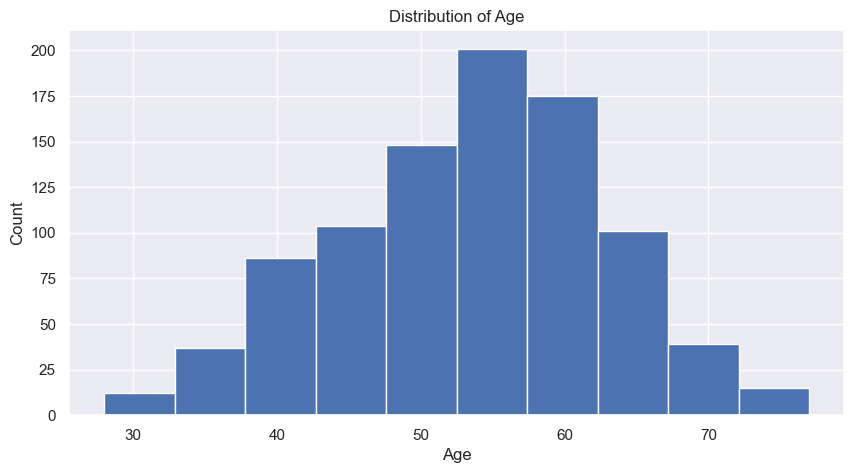

In [6]:
## Use a visually appealing style sheet like seaborn:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 5));

# Visualize distribution of Age
plt.hist(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count');

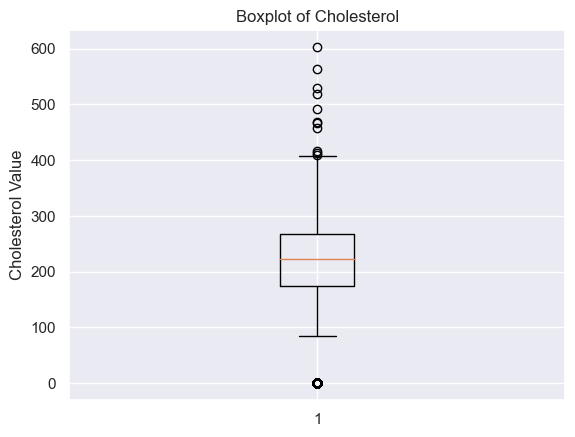

In [7]:
# Boxplot for Cholesterol
plt.boxplot(data['Cholesterol'])
plt.title('Boxplot of Cholesterol')
plt.ylabel('Cholesterol Value');

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

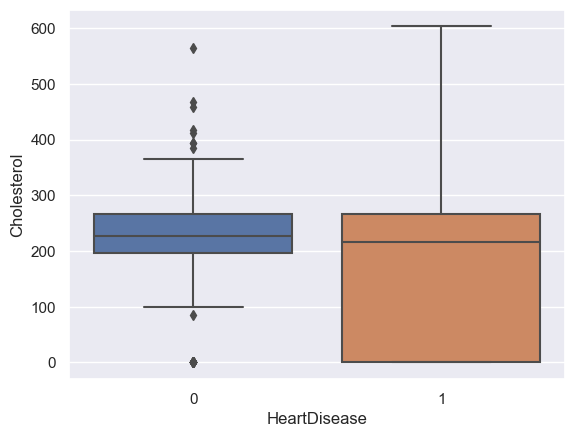

In [8]:
# Boxplot of Cholesterol by Heart Disease 
sns.boxplot(x='HeartDisease', y='Cholesterol', data=data)

<Axes: xlabel='Age', ylabel='MaxHR'>

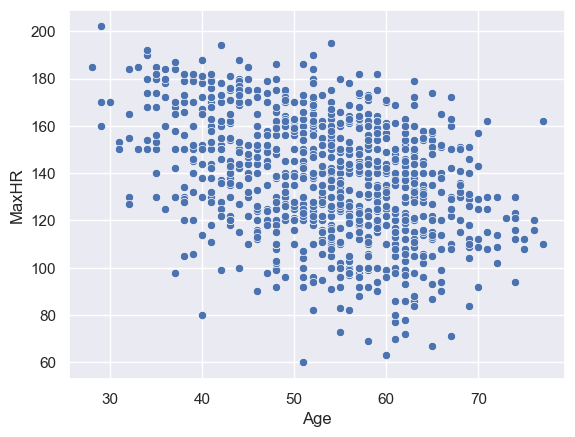

In [9]:
# Scatter plot between Age and MaxHR
sns.scatterplot(x='Age', y='MaxHR', data=data)

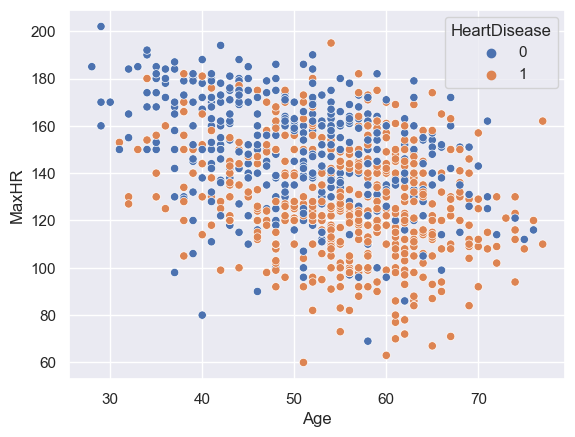

In [10]:
# Scatter plot between Age and MaxHR
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=data);

<Axes: xlabel='FastingBS', ylabel='Count'>

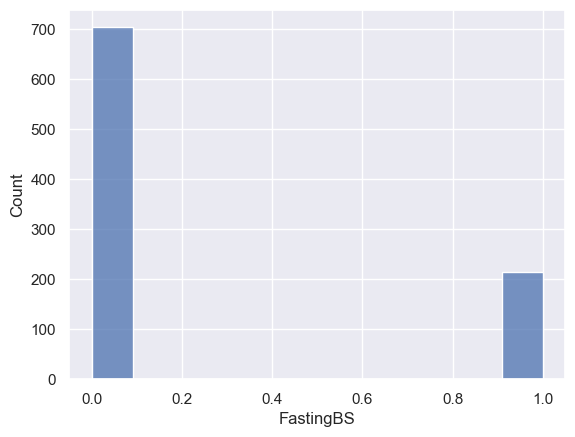

In [11]:
# Histogram for FastingBS 
sns.histplot(data=data, x='FastingBS', kde=False)

Text(0, 0.5, 'Disease')

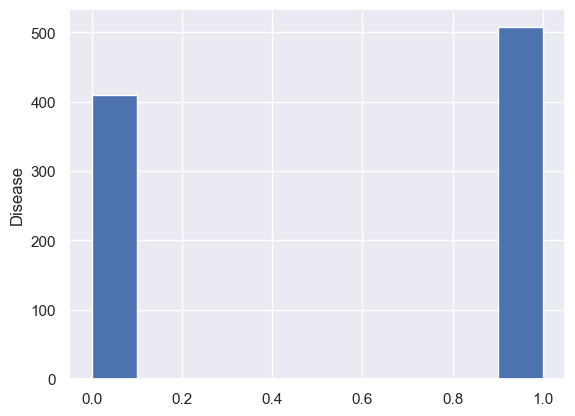

In [12]:
# Countplot for HeartDisease
plt.hist(data['HeartDisease']);
plt.ylabel("Disease")

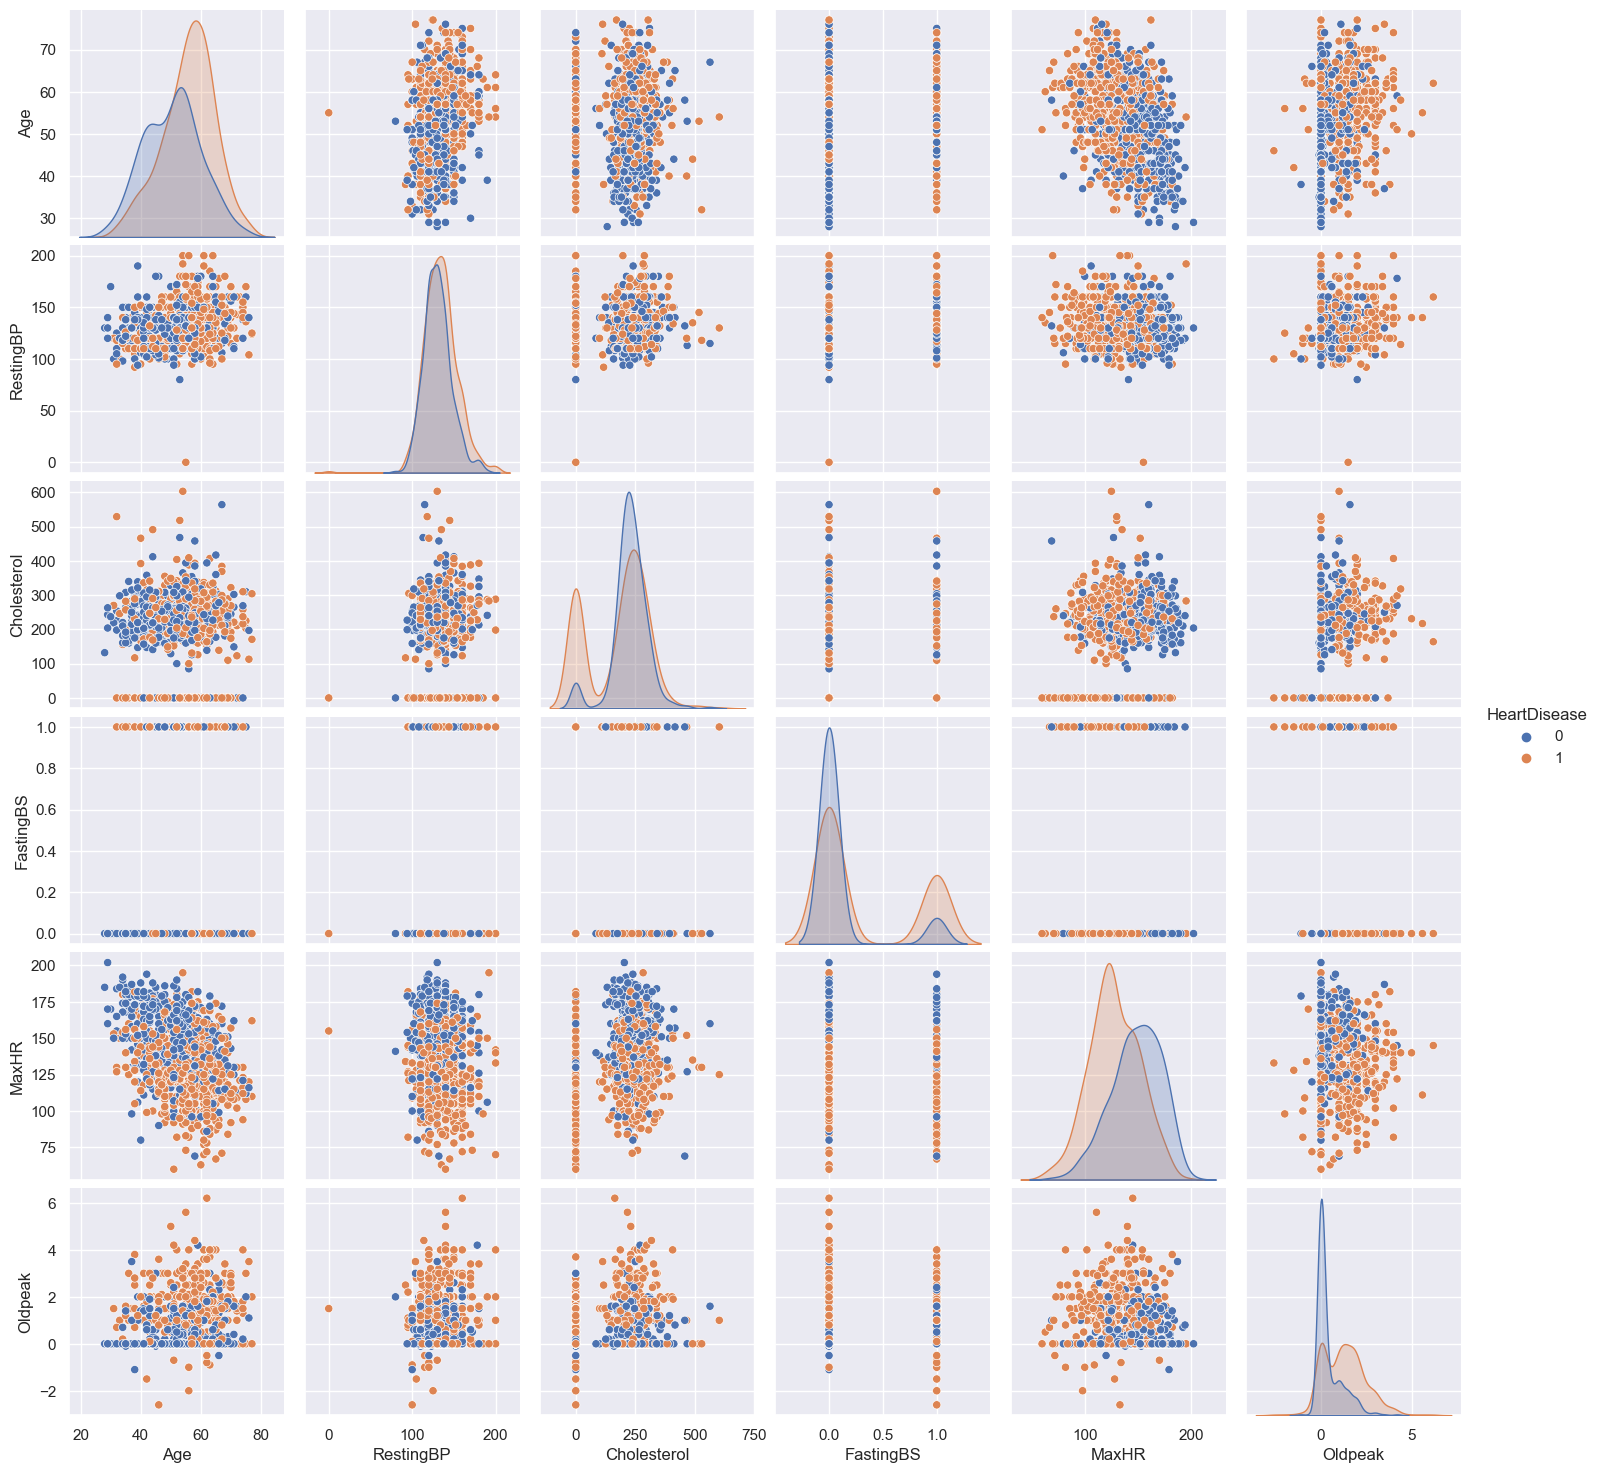

In [13]:
# Pairplot
sns.pairplot(data, hue='HeartDisease') 

<Axes: >

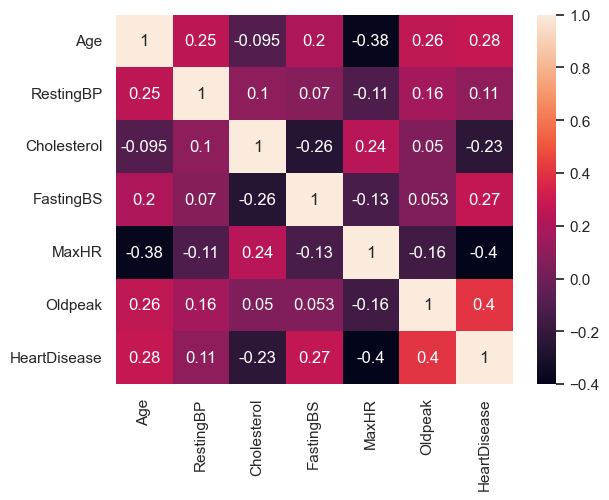

In [14]:
# Specify numeric_only=True explicitly
corr_mat = data.corr(numeric_only=True)

# Or select only numerical columns
num_cols = data.select_dtypes(include=['float', 'int'])
corr_mat = num_cols.corr()
sns.heatmap(corr_mat,annot=True)

In [15]:
## Cheaking statiscal values 
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Data Preprocessing and Model Selection

In [16]:


x = data.drop("HeartDisease",axis=1)
y = data.HeartDisease

cat = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
num = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]

numeric_transformer = Pipeline(steps = [("scaler",MinMaxScaler())])
category_transformer = Pipeline(steps = [ ("encoder",OneHotEncoder()) ])

preprocessor  = ColumnTransformer([("category",category_transformer,cat),
                                 ("numerical",numeric_transformer,num)],remainder='passthrough')

pipeline = Pipeline([("Preprocessor",preprocessor),
                     ("classifier",LogisticRegression())])



## spliting the data into train test 
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y,test_size=0.2 ,random_state = 42)


## fitting the model to data
pipeline.fit(x_train , y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak'])])),
                ('classifier', LogisticRegression())])

## Model Evaluation

In [17]:
## model score
print("Model score :",pipeline.score(x_test ,y_test))


Model score : 0.8641304347826086


In [18]:
## Predicted Value on test Data
y_preds = pipeline.predict(x_test)
y_preds

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [19]:
## accuracy Score
print("Accuracy score :",accuracy_score(y_test , y_preds))

Accuracy score : 0.8641304347826086


In [20]:
## f1 score
print("f1_score :",f1_score(y_test , y_preds))

f1_score : 0.8803827751196173


In [22]:
joblib.dump(pipeline ,"pipeline.pkl")

['pipeline.pkl']

## Model Deployment (Checking the model on user input)

In [23]:
data.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


In [25]:
age = int(input("Enter the Age: "))
sex = input("Enter the Sex(M or F): ")
chest_pain_type = input("Enter the Chest Pain Type: ")
resting_bp = float(input("Enter the Resting Blood Pressure: "))
cholesterol = float(input("Enter the Cholesterol level: "))
fasting_bs = input("Fasting Blood Sugar (1 for > 120 mg/dl, 0 otherwise): ")
resting_ecg = input("Resting ECG Type: ")
max_hr = float(input("Enter the Maximum Heart Rate: "))
exercise_angina = input("Exercise-Induced Angina (Y, N): ")
oldpeak = float(input("Enter the ST Depression induced by exercise relative to rest: "))
st_slope = input("ST Slope Type: ")

# Create a DataFrame with the user input
data = pd.DataFrame({
    'Age': [age],
    'Sex': [sex],
    'ChestPainType': [chest_pain_type],
    'RestingBP': [resting_bp],
    'Cholesterol': [cholesterol],
    'FastingBS': [fasting_bs],
    'RestingECG': [resting_ecg],
    'MaxHR': [max_hr],
    'ExerciseAngina': [exercise_angina],
    'Oldpeak': [oldpeak],
    'ST_Slope': [st_slope]
})

# Predict the data
transformed_data = pipeline["Preprocessor"].transform(data)
prediction = pipeline["classifier"].predict(transformed_data)

print("The Label is:", prediction[0])

Enter the Age: 48
Enter the Sex(M or F): M
Enter the Chest Pain Type: ATA
Enter the Resting Blood Pressure: 140
Enter the Cholesterol level: 289
Fasting Blood Sugar (1 for > 120 mg/dl, 0 otherwise): 0
Resting ECG Type: Normal
Enter the Maximum Heart Rate: 172
Exercise-Induced Angina (Y, N): N
Enter the ST Depression induced by exercise relative to rest: 0
ST Slope Type: Up
The Label is: 0
